In [61]:
import requests
import json

In [62]:
ville = input("Quelle ville souhaitez-vous connaître la météo : ")

Quelle ville souhaitez-vous connaître la météo : Paris


In [56]:
r = requests.get("http://api.openweathermap.org/data/2.5/weather?q={}&appid=3543ac0c00624ed3bb653359621e5344".format(ville))
data = r.json()
print(data)

{'coord': {'lon': 2.35, 'lat': 48.86}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 300.52, 'pressure': 1015, 'humidity': 45, 'temp_min': 300.15, 'temp_max': 301.15}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 40, 'gust': 10.8}, 'clouds': {'all': 0}, 'dt': 1530275400, 'sys': {'type': 1, 'id': 5610, 'message': 0.1794, 'country': 'FR', 'sunrise': 1530244213, 'sunset': 1530302273}, 'id': 2988507, 'name': 'Paris', 'cod': 200}


In [63]:
prev = requests.get("http://api.openweathermap.org/data/2.5/forecast?q={}&appid=3543ac0c00624ed3bb653359621e5344".format(ville))
data_prev = prev.json()
print(json.dumps(data_prev, sort_keys = True, indent = 2))

{
  "city": {
    "coord": {
      "lat": 48.8566,
      "lon": 2.3515
    },
    "country": "FR",
    "id": 2988507,
    "name": "Paris",
    "population": 2138551
  },
  "cnt": 40,
  "cod": "200",
  "list": [
    {
      "clouds": {
        "all": 44
      },
      "dt": 1530284400,
      "dt_txt": "2018-06-29 15:00:00",
      "main": {
        "grnd_level": 1015.21,
        "humidity": 43,
        "pressure": 1015.21,
        "sea_level": 1026.96,
        "temp": 301.96,
        "temp_kf": -0.46,
        "temp_max": 302.418,
        "temp_min": 301.96
      },
      "sys": {
        "pod": "d"
      },
      "weather": [
        {
          "description": "scattered clouds",
          "icon": "03d",
          "id": 802,
          "main": "Clouds"
        }
      ],
      "wind": {
        "deg": 55.5019,
        "speed": 6.46
      }
    },
    {
      "clouds": {
        "all": 68
      },
      "dt": 1530295200,
      "dt_txt": "2018-06-29 18:00:00",
      "main": {
        "grnd_

In [65]:
import datetime
ts = 1530565200
print(datetime.datetime.fromtimestamp(ts))

2018-07-02 23:00:00


In [66]:
def convert(kel):
    celsius = (kel- 273.15)
    return round(celsius, 2)
#convert(300)   

26.85

In [68]:
print("²²²² Bienvenue sur Weather Me ! B) ²²²²")
print("**** Le logiciel de prévision météo des 5 prochains jours. ****")

²²²² Bienvenue sur weather me ! B) ²²²²
**** Le logiciel de prévision météo des 5 prochains jours. ****


In [78]:
ville = input("Quelle ville souhaitez-vous connaître la météo : ")
r = requests.get("http://api.openweathermap.org/data/2.5/weather?q={}&appid=3543ac0c00624ed3bb653359621e5344".format(ville))
data = r.json()
prev = requests.get("http://api.openweathermap.org/data/2.5/forecast?q={}&appid=3543ac0c00624ed3bb653359621e5344".format(ville))
data_prev = prev.json()

date_jour = input("Entrée le numéro en deux chiffre (ex: 05, 15) de la journée don vous voulez connaitre les prévision météo: ")
date_mois = input("Cette fois entrée le mois: ")
date = "2018-"+date_mois+"-"+date_jour


Entrée le numéro en deux chiffre (ex: 05, 15) de la journée don vous voulez connaitre les prévision météo: 30
Cette fois entrée le mois: 06


In [107]:
list_date = []
list_celsius = []
print(date)
for i in range(len(data_prev["list"])):
    if date == data_prev["list"][i]["dt_txt"][0:10]:
        print(data_prev["list"][i]["dt_txt"][11:])
        print(str(convert(data_prev["list"][i]["main"]["temp"]))+"°C")
        list_date.append(data_prev["list"][i]["dt_txt"][11:16])
        list_celsius.append(convert(data_prev["list"][i]["main"]["temp"]))
        print("")
        

2018-06-30
00:00:00
24.24°C

03:00:00
22.44°C

06:00:00
23.15°C

09:00:00
27.86°C

12:00:00
30.14°C

15:00:00
31.02°C

18:00:00
30.44°C

21:00:00
27.32°C



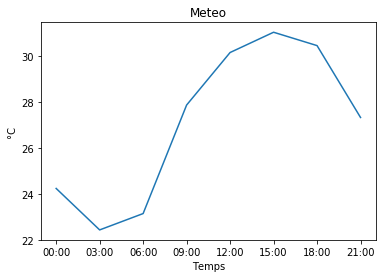

In [108]:
import matplotlib.pyplot as plt

plt.title("Meteo")
plt.plot(list_date, list_celsius)
plt.xlabel('Temps')
plt.ylabel('°C')
plt.show()